<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkST0151ENSkillsNetwork20531532-2022-01-01" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>



#### Import the required libraries we need for the lab.


In [1]:
import piplite
await piplite.install(['numpy'],['pandas'])
await piplite.install(['seaborn'])

In [2]:
import pandas as pd
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as pyplot
import scipy.stats
import statsmodels.api as sm
from statsmodels.formula.api import ols

#### Read the dataset in the csv file from the URL


In [3]:
from js import fetch
import io

URL = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv'
resp = await fetch(URL)
boston_url = io.BytesIO((await resp.arrayBuffer()).to_py())

In [4]:
boston_df=pd.read_csv(boston_url)

#### Add your code below following the instructions given in the course to complete the peer graded assignment


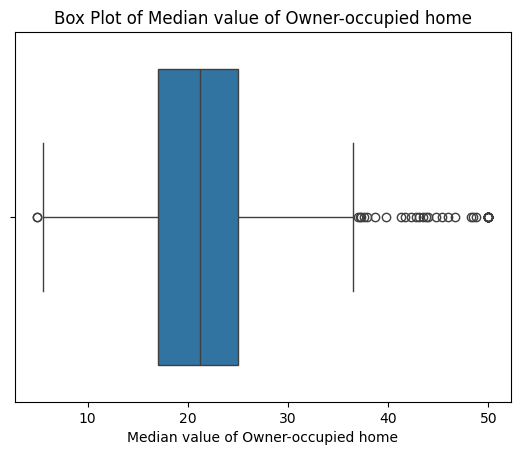

In [5]:
# 1 For "Mediana value owner-occupied homes" provide a boxplot

plot = sns.boxplot(x='MEDV', data = boston_df).set(title='Box Plot of Median value of Owner-occupied home')
pyplot.xlabel('Median value of Owner-occupied home')
pyplot.show(plot)

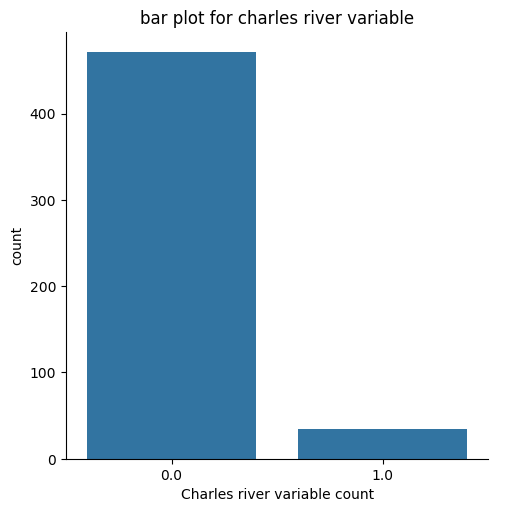

In [7]:
# provide a bar plot for charles river variable

sns.catplot(x='CHAS', kind='count', data=boston_df).set(title='bar plot for charles river variable')
pyplot.xlabel('Charles river variable count')
pyplot.show(sns)

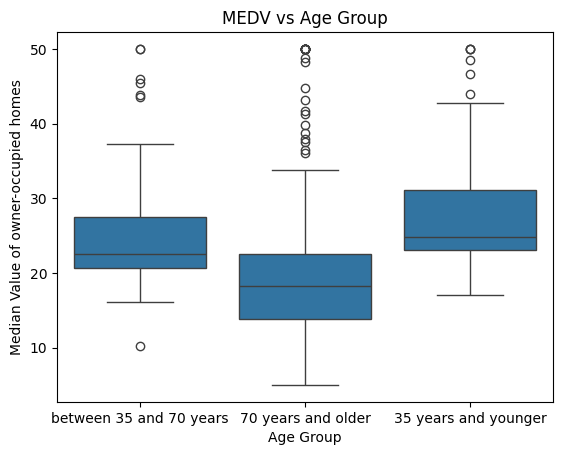

In [16]:
# provide a boxplot for the MEDV variable vs the AGE variable

boston_df.loc[(boston_df['AGE'] <= 35), 'group'] = '35 years and younger' 
boston_df.loc[(boston_df['AGE'] > 35)& (boston_df['AGE'] <70),'group'] = 'between 35 and 70 years' 
boston_df.loc[(boston_df['AGE'] >=70), 'group'] = '70 years and older' 

plot = sns.boxplot(x='group',y='MEDV' ,data = boston_df).set(title='Box Plot of MEDV vs AGE')
pyplot.xlabel('Age Group')
pyplot.ylabel('Median Value of owner-occupied homes')
pyplot.title('MEDV vs Age Group')
pyplot.show(plot)

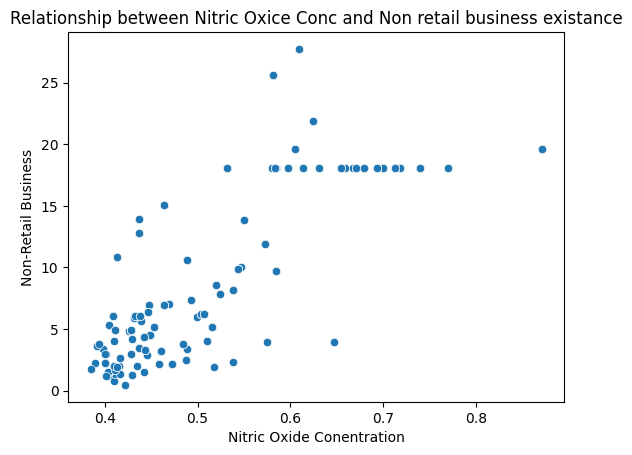

In [18]:
# provide scatter plot to show relationship between Nitric Oxide concentrations and proportion of non retail business 

plot = sns.scatterplot(x='NOX',y='INDUS', data=boston_df)
pyplot.xlabel('Nitric Oxide Conentration')
pyplot.ylabel('Non-Retail Business')
pyplot.title('Relationship between Nitric Oxice Conc and Non retail business existance')
pyplot.show(plot)    

# linear relationshop at lower values

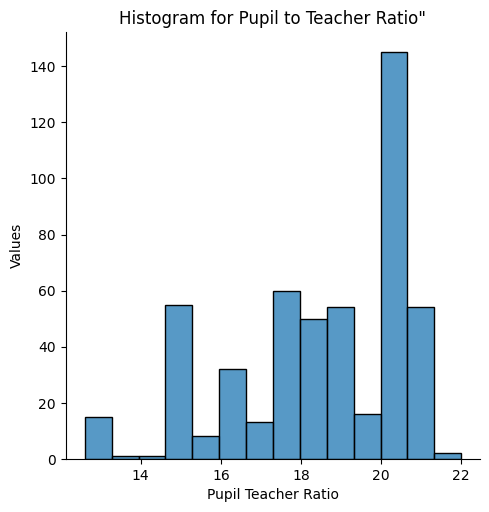

In [20]:
# create a histogram for pupil to teacher ratio variable

plot = sns.displot(boston_df['PTRATIO'], kde = False)
pyplot.xlabel('Pupil Teacher Ratio')
pyplot.ylabel('Values')
pyplot.title('Histogram for Pupil to Teacher Ratio"')
pyplot.show(plot)

In [21]:
# IS THERE A SIGNIFICANT DIFFERENCE IN THE MEDIAN VALUE OF THE HOUSES BOUNDED BY THE cHARLES RIVER OR NOT?

# H0 - there is no difference in median vakue of houses bounded by charles river
# H1 - there is a difference in the median value of hosues bounded by charles river

scipy.stats.ttest_ind(boston_df[boston_df['CHAS']==0]['MEDV'],
                      boston_df[boston_df['CHAS']==1]['MEDV'], equal_var= False)

#conclusion: p-value 0.003 so we reject null hypothesis and conclide there us a difference 

TtestResult(statistic=-3.113291312794837, pvalue=0.003567170098137517, df=36.876408797611994)

In [22]:
# is there a difference in median value of house for each propotion of owner occupied units prior to 1940 (AGE)?

#H0 - the three means are equal
#H1 - the three means are different 

group1 = boston_df[boston_df['group'] == '35 years and younger']['MEDV']
group2 = boston_df[boston_df['group'] == 'between 35 and 70 years']['MEDV']
group3 = boston_df[boston_df['group'] == '70 years and older']['MEDV']

f_statistic, p_value = scipy.stats.f_oneway(group1, group2, group3)
print("F_Statistic: {0}, P-Value: {1}".format(f_statistic, p_value))

#Conclusion: reject null hypothesis based on P-value <0.05

F_Statistic: 36.40764999196599, P-Value: 1.7105011022702984e-15


In [24]:
# can we conclude no relationship between Nitric Oxide and proportion of non retail bsuiness in the area

# H0 - there is correlation
# H1 - no correlation

scipy.stats.pearsonr(boston_df['NOX'],boston_df['INDUS'])

# no correlation as we reject null hypothesis based on p value < 0.05


PearsonRResult(statistic=0.7636514469209192, pvalue=7.913361061210442e-98)

In [26]:
# what is the impact of addiitonal weighted distance to the 5 boston employemnt centre on the median value of owner od occupied homes

# H0 - weighted distnce is not correlated to MEDV
# H1 - weighted distance is correlated

X= boston_df['DIS']
y=boston_df['MEDV']
X = sm.add_constant(X)

model = sm.OLS(y,X).fit()
predictions = model.predict(X)

model.summary()

# reject null hypothesis as p value is 0.00

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:                     33.58
Date:                Mon, 04 Mar 2024   Prob (F-statistic):           1.21e-08
Time:                        18:25:57   Log-Likelihood:                -1823.9
No. Observations:                 506   AIC:                             3652.
Df Residuals:                     504   BIC:                             3660.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         18.3901      0.817     22.499      0.000      16.784      19.996
DIS            1.0916      0.188      5.795      0.000       0.722       1.462
==============================================================================
Omnibus:                      139.779   Durbin-Watson:                   0.570
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              305.104
Skew:                           1.466   Prob(JB):                     5.59e-67
Kurtosis:                       5.424   Cond. No.                         9.32
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""